In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("Aggregated dataset") \
    .getOrCreate()

In [2]:
# load the dataset
data = spark.read.csv("GROUP2.csv.gz", header=True, sep=',',inferSchema="true")
data.dtypes

[('groupId', 'string'),
 ('matchId', 'string'),
 ('matchDuration', 'int'),
 ('winPlaceClass', 'int'),
 ('isFirstPerson', 'boolean'),
 ('matchtype', 'int'),
 ('maxPlace', 'int'),
 ('numGroups', 'int'),
 ('hasDisconnected', 'int'),
 ('assist_SUM', 'int'),
 ('assist_MAX', 'int'),
 ('assist_AVG', 'int'),
 ('heals_SUM', 'int'),
 ('heals_MAX', 'int'),
 ('heals_AVG', 'int'),
 ('kills_SUM', 'int'),
 ('kills_MAX', 'int'),
 ('kills_AVG', 'int'),
 ('headshotKills_SUM', 'int'),
 ('headshotKills_MAX', 'int'),
 ('headshotKills_AVG', 'int'),
 ('killStreaks_MAX', 'int'),
 ('roadKills_SUM', 'int'),
 ('roadKills_MAX', 'int'),
 ('roadKills_AVG', 'int'),
 ('longestKill_MAX', 'double'),
 ('vehicleDestroys_MAX', 'int'),
 ('weaponsAcquired_SUM', 'int'),
 ('weaponsAcquired_MAX', 'int'),
 ('weaponsAcquired_AVG', 'int'),
 ('damageDealt_SUM', 'double'),
 ('damageDealt_MAX', 'double'),
 ('damageDealt_AVG', 'double'),
 ('distance_SUM', 'double'),
 ('distance_MAX', 'double'),
 ('distance_AVG', 'double'),
 ('rideDis

In [3]:
dtypes = data.dtypes
for col in dtypes:
    data = data.withColumnRenamed(col[0], col[0].replace("_", ""))

In [4]:
from pyspark.sql import SQLContext

sqlCtx = SQLContext(spark)

data.createOrReplaceTempView("pubg")

In [5]:
numerical_columns = [ 'assist',
                     'damageDealt',
                     'DBNOs',
                     'headshotKills',
                     'heals',
                     'killPlace',
                     'killPoints',
                     'kills',
                     'killStreaks',
                     'longestKill',
                     'matchDuration',
                     'maxPlace',
                     'numGroups',
                     'rankPoints',
                     'revives',
                     'rideDistance',
                     'roadKills',
                     'swimDistance',
                     'teamKills',
                     'vehicleDestroys',
                     'walkDistance',
                     'weaponsAcquired',
                     'winPoints',
                     'winPlacePerc',
                     'distance'
                    ]

In [7]:
from tqdm import tqdm

100%|██████████| 25/25 [05:46<00:00, 13.87s/it]


<Figure size 432x288 with 0 Axes>

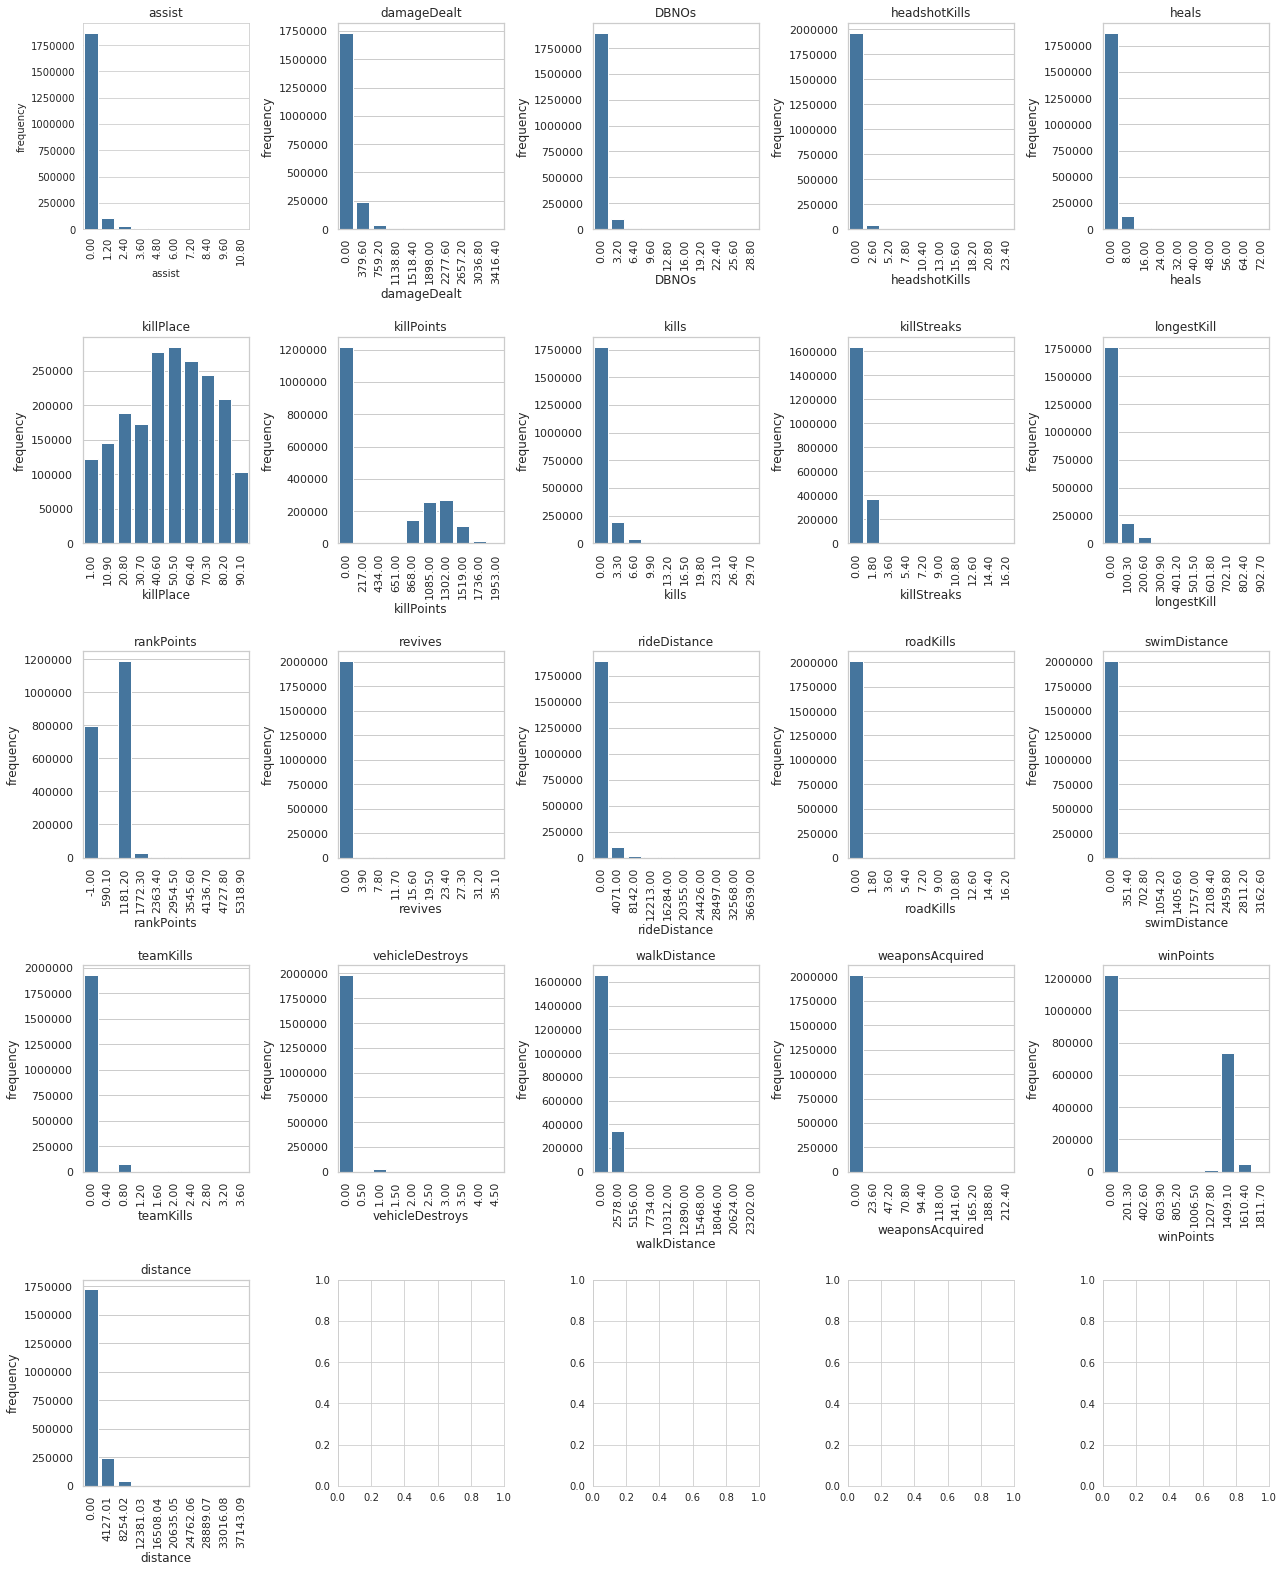

In [10]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,5,figsize=(18,22))

for col in tqdm(numerical_columns):
    if col in ['matchDuration','maxPlace', 'numGroups','winPlacePerc']:
        continue
    i += 1
    plt.subplot(5,5,i)
        
    rdd = spark.sql(f'SELECT {col}MAX FROM pubg').rdd.map(lambda x: x[0])
    l = rdd.histogram(10)
    df = pd.DataFrame(list(zip(*l)), columns=[col, 'frequency'])
    df[col] = df[col].apply(lambda x: f'{x:.2f}')
    
    # display
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x = col, y = 'frequency', data = df, color='#3776ab')
    #ax.yaxis.set_ticklabels([])
    #ax.set(xlabel=col, ylabel='frequency')
    ax.tick_params(axis='x', rotation=90)
    plt.title(col)
    
fig.tight_layout()
plt.show()
#fig.savefig('plot.pdf', bbox_inches='tight')

100%|██████████| 25/25 [03:57<00:00,  9.50s/it]


<Figure size 432x288 with 0 Axes>

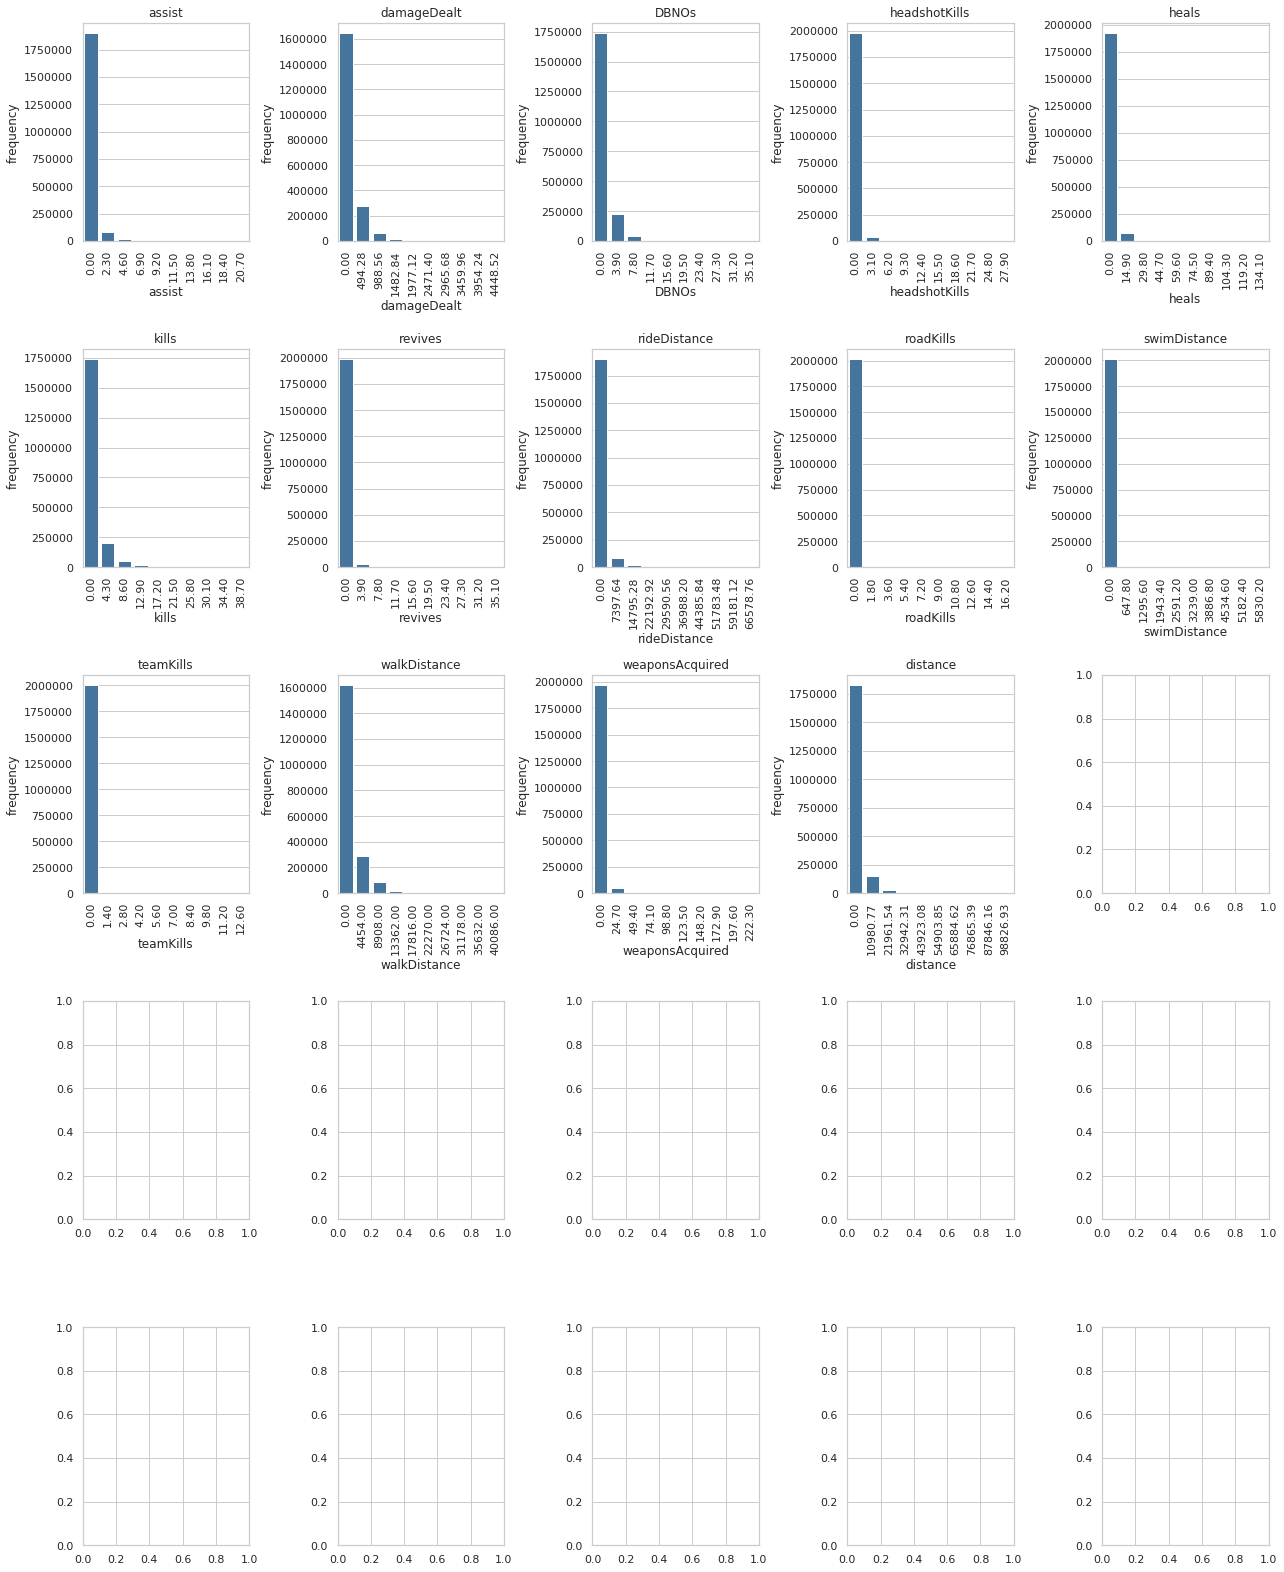

In [11]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,5,figsize=(18,22))

for col in tqdm(numerical_columns):
    if col in ['matchDuration','maxPlace', 'numGroups','winPlacePerc','longestKill','vehicleDestroys',
               'killPlace','rankPoints','killPoints','winPoints','killStreaks']:
        continue
    i += 1
    plt.subplot(5,5,i)
        
    rdd = spark.sql(f'SELECT {col}SUM FROM pubg').rdd.map(lambda x: x[0])
    l = rdd.histogram(10)
    df = pd.DataFrame(list(zip(*l)), columns=[col, 'frequency'])
    df[col] = df[col].apply(lambda x: f'{x:.2f}')
    
    # display
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x = col, y = 'frequency', data = df, color='#3776ab')
    #ax.yaxis.set_ticklabels([])
    #ax.set(xlabel=col, ylabel='frequency')
    ax.tick_params(axis='x', rotation=90)
    plt.title(col)
    
fig.tight_layout()
plt.show()
#fig.savefig('plot.pdf', bbox_inches='tight')

100%|██████████| 25/25 [03:51<00:00,  9.27s/it]


<Figure size 432x288 with 0 Axes>

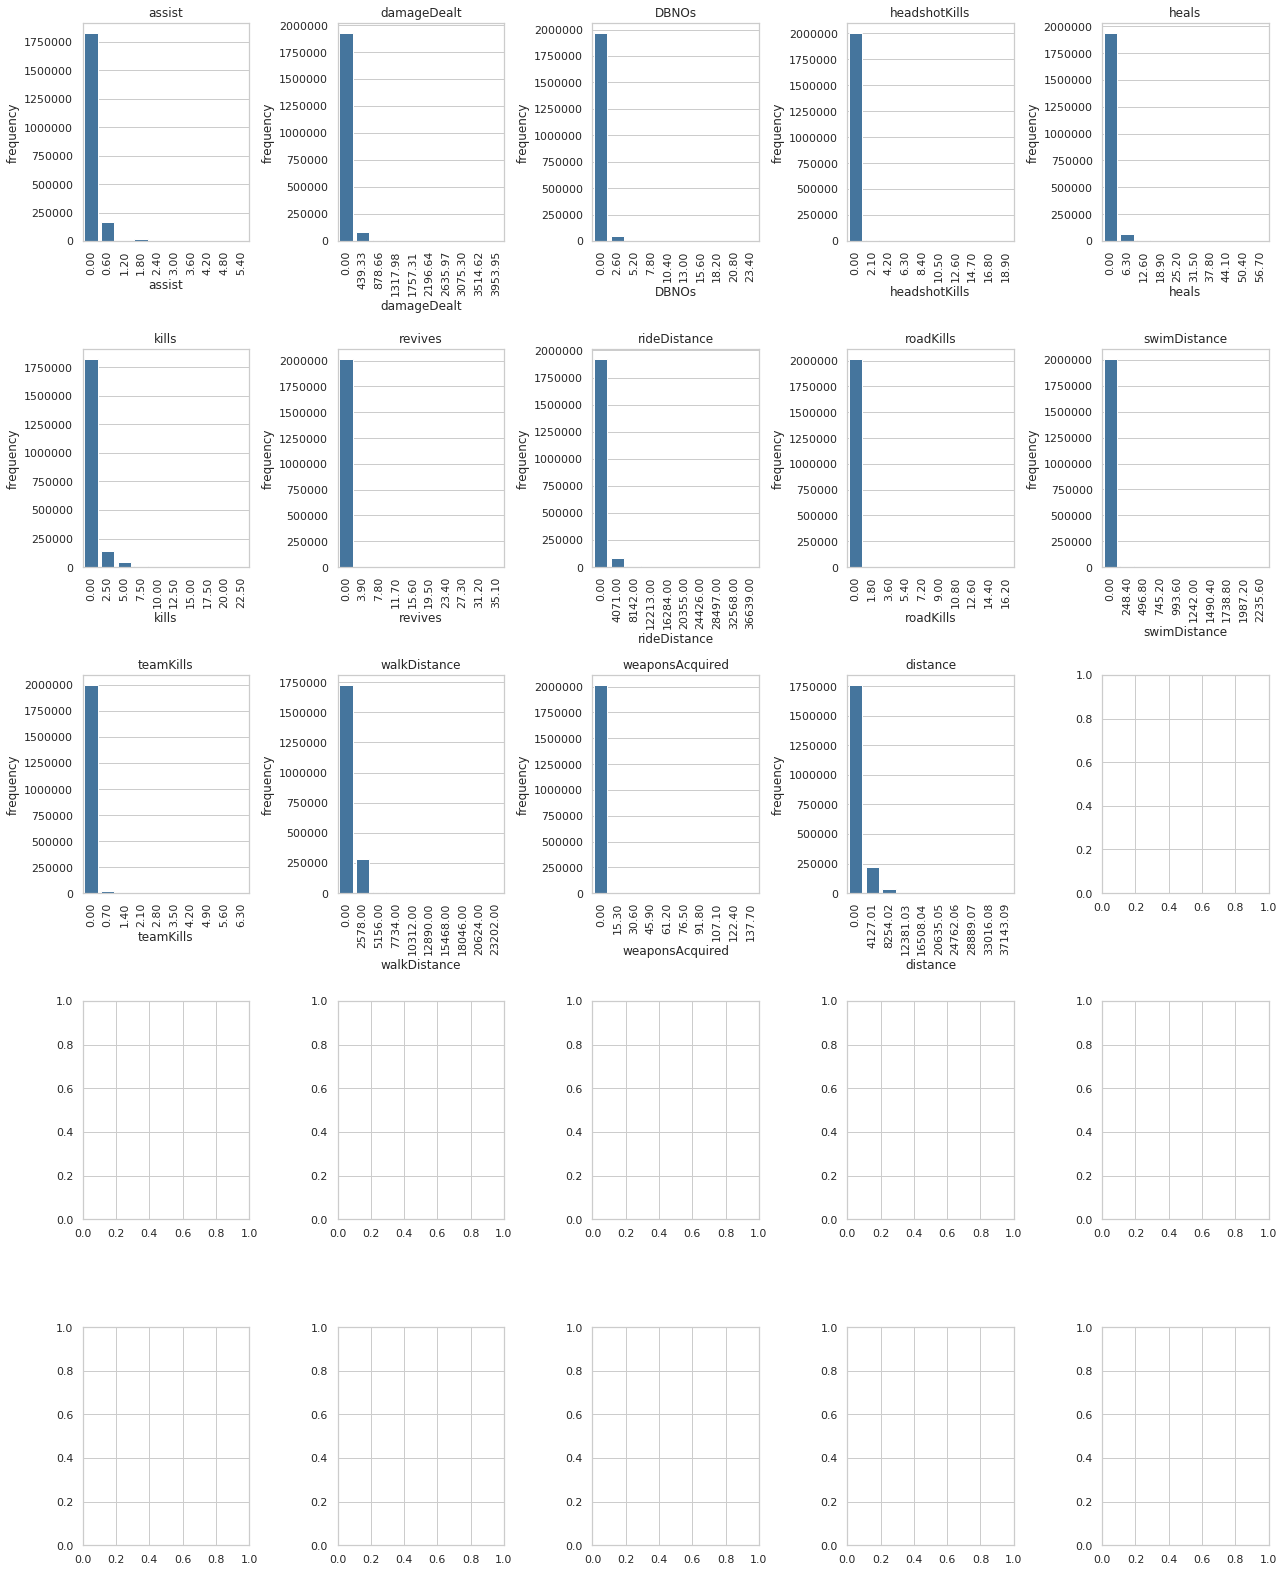

In [12]:
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,5,figsize=(18,22))

for col in tqdm(numerical_columns):
    if col in ['matchDuration','maxPlace', 'numGroups','winPlacePerc','longestKill','vehicleDestroys',
           'killPlace','rankPoints','killPoints','winPoints','killStreaks']:
        continue
    i += 1
    plt.subplot(5,5,i)
        
    rdd = spark.sql(f'SELECT {col}AVG FROM pubg').rdd.map(lambda x: x[0])
    l = rdd.histogram(10)
    df = pd.DataFrame(list(zip(*l)), columns=[col, 'frequency'])
    df[col] = df[col].apply(lambda x: f'{x:.2f}')
    
    # display
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x = col, y = 'frequency', data = df, color='#3776ab')
    #ax.yaxis.set_ticklabels([])
    #ax.set(xlabel=col, ylabel='frequency')
    ax.tick_params(axis='x', rotation=90)
    plt.title(col)
    
fig.tight_layout()
plt.show()
#fig.savefig('plot.pdf', bbox_inches='tight')

In [6]:
for column in data.columns:
    if 'MAX' in column:
        print(column)
        spark.sql(f'SELECT matchType, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType').show()
        spark.sql(f'SELECT winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY winPlaceClass').show()
        spark.sql(f'SELECT matchType, winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType, winPlaceClass').show()

assistMAX
+---------+------------------+--------------+--------------+
|matchType|    avg(assistMAX)|min(assistMAX)|max(assistMAX)|
+---------+------------------+--------------+--------------+
|        1|0.0593236748483456|             0|             5|
|        4|0.6625012257753853|             0|            12|
|        2|0.3715848876435275|             0|             9|
+---------+------------------+--------------+--------------+

+-------------+-------------------+--------------+--------------+
|winPlaceClass|     avg(assistMAX)|min(assistMAX)|max(assistMAX)|
+-------------+-------------------+--------------+--------------+
|            1| 1.6829247585694578|             0|            10|
|            6|0.11730422803857159|             0|             4|
|            3| 0.3446799849898554|             0|             8|
|            5|0.15524462132818223|             0|             5|
|            4|0.23207509164887402|             0|             6|
|            2| 0.6236256798653744

+---------+---------------------+---------------------+---------------------+
|matchType|avg(headshotKillsMAX)|min(headshotKillsMAX)|max(headshotKillsMAX)|
+---------+---------------------+---------------------+---------------------+
|        1|   0.2537187479227899|                    0|                   19|
|        4|   0.5930894076906977|                    0|                   26|
|        2|  0.40163740676095583|                    0|                   17|
+---------+---------------------+---------------------+---------------------+

+-------------+---------------------+---------------------+---------------------+
|winPlaceClass|avg(headshotKillsMAX)|min(headshotKillsMAX)|max(headshotKillsMAX)|
+-------------+---------------------+---------------------+---------------------+
|            1|    1.851682054547384|                    0|                   26|
|            6|  0.09464872311115821|                    0|                    3|
|            3|  0.40056097235207694|      

+---------+-------------------+-------------------+-------------------+
|matchType|avg(longestKillMAX)|min(longestKillMAX)|max(longestKillMAX)|
+---------+-------------------+-------------------+-------------------+
|        1|  22.24147755876205|                0.0|             1001.0|
|        4|  54.53058807946206|                0.0|             1000.0|
|        2| 36.482736221910905|                0.0|             1003.0|
+---------+-------------------+-------------------+-------------------+

+-------------+-------------------+-------------------+-------------------+
|winPlaceClass|avg(longestKillMAX)|min(longestKillMAX)|max(longestKillMAX)|
+-------------+-------------------+-------------------+-------------------+
|            1| 155.39705191552648|                0.0|             1003.0|
|            6| 3.1313053851859616|                0.0|              814.8|
|            3|  39.71141520179857|                0.0|              994.5|
|            5|  7.663724159478502|    

+---------+-------------+-----------------------+-----------------------+-----------------------+
|matchType|winPlaceClass|avg(weaponsAcquiredMAX)|min(weaponsAcquiredMAX)|max(weaponsAcquiredMAX)|
+---------+-------------+-----------------------+-----------------------+-----------------------+
|        2|            2|       6.30816699325783|                      0|                    167|
|        2|            3|      5.517417597605291|                      0|                    128|
|        1|            2|       5.37339132613793|                      0|                     32|
|        1|            1|       5.95307954976603|                      0|                     52|
|        1|            3|      4.573340264010445|                      0|                    153|
|        2|            5|      2.247664008450649|                      0|                     16|
|        1|            4|      3.182716035146791|                      0|                     18|
|        4|         

+---------+--------------------+--------------------+--------------------+
|matchType|avg(rideDistanceMAX)|min(rideDistanceMAX)|max(rideDistanceMAX)|
+---------+--------------------+--------------------+--------------------+
|        1|     479.97440239742|                 0.0|             40710.0|
|        4|   967.8006147374123|                 0.0|             29000.0|
|        2|   684.5180704881725|                 0.0|             31020.0|
+---------+--------------------+--------------------+--------------------+

+-------------+--------------------+--------------------+--------------------+
|winPlaceClass|avg(rideDistanceMAX)|min(rideDistanceMAX)|max(rideDistanceMAX)|
+-------------+--------------------+--------------------+--------------------+
|            1|  1714.0957910771508|                 0.0|             35400.0|
|            6|   19.28269986436369|                 0.0|             15240.0|
|            3|   1057.584785657252|                 0.0|             37670.0|


+---------+------------------+-------------+-------------+
|matchType|     avg(DBNOsMAX)|min(DBNOsMAX)|max(DBNOsMAX)|
+---------+------------------+-------------+-------------+
|        1|               0.0|            0|            0|
|        4|1.8949272657817666|            0|           32|
|        2|1.0544085533370382|            0|           31|
+---------+------------------+-------------+-------------+

+-------------+-------------------+-------------+-------------+
|winPlaceClass|      avg(DBNOsMAX)|min(DBNOsMAX)|max(DBNOsMAX)|
+-------------+-------------------+-------------+-------------+
|            1| 3.1754642895044043|            0|           32|
|            6|0.48945639504079685|            0|            5|
|            3| 0.9683960134073665|            0|           31|
|            5|  0.600889645640445|            0|           15|
|            4| 0.7993634935342223|            0|           24|
|            2| 1.3862653931282403|            0|           25|
+---------

+---------+------------------+-----------------+-----------------+
|matchType| avg(killPlaceMAX)|min(killPlaceMAX)|max(killPlaceMAX)|
+---------+------------------+-----------------+-----------------+
|        1|  47.3698431001945|                1|              100|
|        4|56.475202746907755|                1|              100|
|        2| 53.82233823563943|                1|              100|
+---------+------------------+-----------------+-----------------+

+-------------+------------------+-----------------+-----------------+
|winPlaceClass| avg(killPlaceMAX)|min(killPlaceMAX)|max(killPlaceMAX)|
+-------------+------------------+-----------------+-----------------+
|            1|19.248583253740847|                1|               57|
|            6| 93.27648617145279|                5|              100|
|            3| 43.07819903706106|                1|               76|
|            5|  78.2122077532805|                1|              100|
|            4| 57.85195383313862

+---------+-----------------+-----------------+-----------------+
|matchType|avg(winPointsMAX)|min(winPointsMAX)|max(winPointsMAX)|
+---------+-----------------+-----------------+-----------------+
|        1|563.1150767158839|                0|             1922|
|        4| 645.249425898036|                0|             2013|
|        2|594.4588871582539|                0|             1867|
+---------+-----------------+-----------------+-----------------+

+-------------+-----------------+-----------------+-----------------+
|winPlaceClass|avg(winPointsMAX)|min(winPointsMAX)|max(winPointsMAX)|
+-------------+-----------------+-----------------+-----------------+
|            1|627.5381513318476|                0|             2013|
|            6| 608.716011444315|                0|             1953|
|            3|601.3094337062548|                0|             1999|
|            5|596.5665069439818|                0|             1958|
|            4|597.1503263102768|              

In [7]:
for column in data.columns:
    if 'AVG' in column:
        print(column)
        spark.sql(f'SELECT matchType, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType').show()
        spark.sql(f'SELECT winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY winPlaceClass').show()
        spark.sql(f'SELECT matchType, winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType, winPlaceClass').show()

assistAVG
+---------+-------------------+--------------+--------------+
|matchType|     avg(assistAVG)|min(assistAVG)|max(assistAVG)|
+---------+-------------------+--------------+--------------+
|        1|0.05932945491117488|             0|             5|
|        4|0.13698972983178703|             0|             6|
|        2|0.12081745106173149|             0|             6|
+---------+-------------------+--------------+--------------+

+-------------+--------------------+--------------+--------------+
|winPlaceClass|      avg(assistAVG)|min(assistAVG)|max(assistAVG)|
+-------------+--------------------+--------------+--------------+
|            1|  0.7205560861721321|             0|             6|
|            6|0.008222952209388576|             0|             3|
|            3| 0.08641433511207787|             0|             4|
|            5|  0.0223743588889629|             0|             3|
|            4| 0.04216653909680538|             0|             4|
|            2| 0.2

+---------+---------------------+---------------------+---------------------+
|matchType|avg(headshotKillsAVG)|min(headshotKillsAVG)|max(headshotKillsAVG)|
+---------+---------------------+---------------------+---------------------+
|        1|  0.25395717551449787|                    0|                   19|
|        4|  0.10040381066124544|                    0|                   21|
|        2|  0.13201631145167222|                    0|                   12|
+---------+---------------------+---------------------+---------------------+

+-------------+---------------------+---------------------+---------------------+
|winPlaceClass|avg(headshotKillsAVG)|min(headshotKillsAVG)|max(headshotKillsAVG)|
+-------------+---------------------+---------------------+---------------------+
|            1|   0.8487318263822562|                    0|                   21|
|            6| 0.001589488184804493|                    0|                    2|
|            3|  0.15480377628100347|      

+---------+-------------------+-------------------+-------------------+
|matchType|avg(damageDealtAVG)|min(damageDealtAVG)|max(damageDealtAVG)|
+---------+-------------------+-------------------+-------------------+
|        1| 121.84446295469388|                0.0|            4393.28|
|        4| 149.85180708756326|                0.0|             3014.0|
|        2| 139.23858605723456|                0.0|             2554.0|
+---------+-------------------+-------------------+-------------------+

+-------------+-------------------+-------------------+-------------------+
|winPlaceClass|avg(damageDealtAVG)|min(damageDealtAVG)|max(damageDealtAVG)|
+-------------+-------------------+-------------------+-------------------+
|            1| 450.87865851339177|                0.0|             3014.0|
|            6|  50.89709716894484|                0.0|            4393.28|
|            3|  137.9711335631311|                0.0|             1974.0|
|            5|  60.90901751483788|    

+---------+--------------------+--------------------+--------------------+
|matchType|avg(swimDistanceAVG)|min(swimDistanceAVG)|max(swimDistanceAVG)|
+---------+--------------------+--------------------+--------------------+
|        1|   5.287541785374712|                 0.0|              1974.0|
|        4|   5.497863380881175|                 0.0|              2484.0|
|        2|   4.631138186251029|                 0.0|              1757.0|
+---------+--------------------+--------------------+--------------------+

+-------------+--------------------+--------------------+--------------------+
|winPlaceClass|avg(swimDistanceAVG)|min(swimDistanceAVG)|max(swimDistanceAVG)|
+-------------+--------------------+--------------------+--------------------+
|            1|   11.51775012752486|                 0.0|              1452.1|
|            6| 0.18597728073893538|                 0.0|               485.6|
|            3|   5.423502219384777|                 0.0|              2484.0|


+---------+-------------------+---------------+---------------+
|matchType|    avg(revivesAVG)|min(revivesAVG)|max(revivesAVG)|
+---------+-------------------+---------------+---------------+
|        1|                0.0|              0|              0|
|        4|0.07423295733130769|              0|             18|
|        2|0.07213669059117271|              0|             39|
+---------+-------------------+---------------+---------------+

+-------------+--------------------+---------------+---------------+
|winPlaceClass|     avg(revivesAVG)|min(revivesAVG)|max(revivesAVG)|
+-------------+--------------------+---------------+---------------+
|            1| 0.19775018571580177|              0|              9|
|            6|4.238635159478648E-5|              0|              1|
|            3|0.053644306215429496|              0|             15|
|            5|0.004225504562712316|              0|             12|
|            4|0.025063449220481007|              0|             18|

In [8]:
for column in data.columns:
    if 'SUM' in column:
        print(column)
        spark.sql(f'SELECT matchType, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType').show()
        spark.sql(f'SELECT winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY winPlaceClass').show()
        spark.sql(f'SELECT matchType, winPlaceClass, AVG({column}), MIN({column}), MAX({column}) FROM pubg GROUP BY matchType, winPlaceClass').show()

assistSUM
+---------+-------------------+--------------+--------------+
|matchType|     avg(assistSUM)|min(assistSUM)|max(assistSUM)|
+---------+-------------------+--------------+--------------+
|        1|0.05932945491117488|             0|             5|
|        4|  1.004153731992079|             0|            23|
|        2| 0.4415973325610701|             0|            13|
+---------+-------------------+--------------+--------------+

+-------------+-------------------+--------------+--------------+
|winPlaceClass|     avg(assistSUM)|min(assistSUM)|max(assistSUM)|
+-------------+-------------------+--------------+--------------+
|            1|  2.866327072057731|             0|            23|
|            6|0.13809473349581436|             0|             5|
|            3|0.45726454955785795|             0|            13|
|            5|0.18636140345034305|             0|             9|
|            4|0.29227530918905853|             0|            13|
|            2| 0.885668024

+---------+---------------------+---------------------+---------------------+
|matchType|avg(headshotKillsSUM)|min(headshotKillsSUM)|max(headshotKillsSUM)|
+---------+---------------------+---------------------+---------------------+
|        1|  0.25395717551449787|                    0|                   19|
|        4|   0.7616112030747569|                    0|                   31|
|        2|  0.45541510452948036|                    0|                   22|
+---------+---------------------+---------------------+---------------------+

+-------------+---------------------+---------------------+---------------------+
|winPlaceClass|avg(headshotKillsSUM)|min(headshotKillsSUM)|max(headshotKillsSUM)|
+-------------+---------------------+---------------------+---------------------+
|            1|   2.4986310092327284|                    0|                   31|
|            6|  0.10605065169015578|                    0|                    4|
|            3|   0.4599188858571789|      

+---------+-------------------+-------------------+-------------------+
|matchType|avg(damageDealtSUM)|min(damageDealtSUM)|max(damageDealtSUM)|
+---------+-------------------+-------------------+-------------------+
|        1| 121.84446295469388|                0.0|            4393.28|
|        4| 460.37855703728786|                0.0|             4942.8|
|        2| 268.34901117225303|                0.0|             3705.0|
+---------+-------------------+-------------------+-------------------+

+-------------+-------------------+-------------------+-------------------+
|winPlaceClass|avg(damageDealtSUM)|min(damageDealtSUM)|max(damageDealtSUM)|
+-------------+-------------------+-------------------+-------------------+
|            1|  1081.337970344904|                0.0|             4942.8|
|            6|  131.2259173338966|                0.0|            4393.28|
|            3|  275.0505080743111|                0.0|             3282.4|
|            5|  143.5510680934648|    

+---------+--------------------+--------------------+--------------------+
|matchType|avg(swimDistanceSUM)|min(swimDistanceSUM)|max(swimDistanceSUM)|
+---------+--------------------+--------------------+--------------------+
|        1|   5.287541785374712|                 0.0|              1974.0|
|        4|  15.475099132955783|                 0.0|              6478.0|
|        2|   8.880465090205977|                 0.0|              3514.0|
+---------+--------------------+--------------------+--------------------+

+-------------+--------------------+--------------------+--------------------+
|winPlaceClass|avg(swimDistanceSUM)|min(swimDistanceSUM)|max(swimDistanceSUM)|
+-------------+--------------------+--------------------+--------------------+
|            1|   28.17792136262348|                 0.0|  3014.8999999999996|
|            6| 0.46308575182791184|                 0.0|               485.6|
|            3|  10.857518968752133|                 0.0|  3115.3999999999996|


+---------+------------------+---------------+---------------+
|matchType|   avg(revivesSUM)|min(revivesSUM)|max(revivesSUM)|
+---------+------------------+---------------+---------------+
|        1|               0.0|              0|              0|
|        4|0.7549049310565379|              0|             24|
|        2|0.3271025257703717|              0|             39|
+---------+------------------+---------------+---------------+

+-------------+--------------------+---------------+---------------+
|winPlaceClass|     avg(revivesSUM)|min(revivesSUM)|max(revivesSUM)|
+-------------+--------------------+---------------+---------------+
|            1|  1.2821394460362943|              0|             19|
|            6|0.026766981032107662|              0|              4|
|            3| 0.40073481865922095|              0|             30|
|            5| 0.10900761007127156|              0|             16|
|            4|  0.2649095596825525|              0|             26|
|     